In [15]:
import sqlite3                    
import pandas as pd
import numpy as np       
import matplotlib.pyplot as plt    
plt.style.use('seaborn')
#plt.rcdefaults()

In [16]:
conn = sqlite3.connect('C:/Users/ayushrastogi/OneDrive/ML DS Big Data/Meetup/Big Data Meetup/Wyoming Production Data/ProductiontableWY.db')
cur = conn.cursor()

In [17]:
# SQL Query - Entire data from database converted to a dataframe
data= pd.read_sql_query(" SELECT * FROM ProductiontableWY ORDER BY [Cum BOE] DESC;", conn)
print(data.head(10))
print (data.shape)
index_data  = data.index
print(index_data)
col = data.columns
print(col)

          API/UWI           Operator Alias     Well/Lease Name Well Number  \
0  49035208180000  EXXON MOBIL CORPORATION      UNIT W-0317228        1528   
1  49035208180000  EXXON MOBIL CORPORATION      UNIT W-0317228        1528   
2  49035208180000  EXXON MOBIL CORPORATION      UNIT W-0317228        1528   
3  49035208490000  EXXON MOBIL CORPORATION        UNIT 66-5165        1716   
4  49035208490000  EXXON MOBIL CORPORATION        UNIT 66-5165        1716   
5  49035208490000  EXXON MOBIL CORPORATION        UNIT 66-5165        1716   
6  49035208460000  EXXON MOBIL CORPORATION  FOGARTY CREEK UNIT        1817   
7  49035208460000  EXXON MOBIL CORPORATION  FOGARTY CREEK UNIT        1817   
8  49035208460000  EXXON MOBIL CORPORATION  FOGARTY CREEK UNIT        1817   
9  49035208710000  EXXON MOBIL CORPORATION      UNIT W-0318400         811   

  Entity Type  County/Parish Reservoir Production Type Producing Status  \
0         COM  SUBLETTE (WY)   MADISON             GAS           A

(143996, 104)


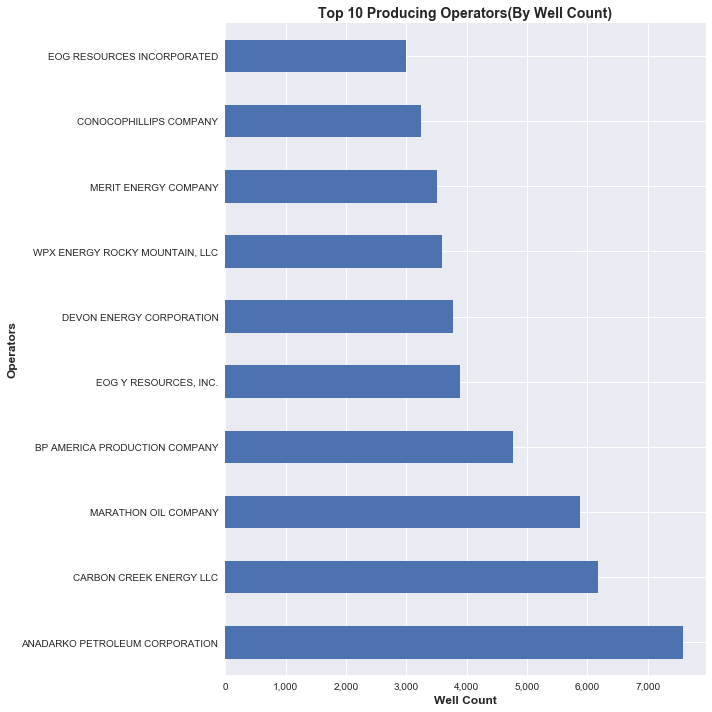

In [18]:
data_distinct = pd.read_sql_query(" SELECT DISTINCT * FROM ProductiontableWY ORDER BY [Cum BOE] DESC;", conn)
print (data_distinct.shape)
# Total Rows 287,992
# Distinct Rows 143,996

# Plot 1: Most Productive Reservoirs (Cum BOE) in Entire Wyoming Dataset 
fig, ax = plt.subplots()
data_distinct['Operator Alias'].value_counts()[:10].plot(kind='barh', figsize = (10,10))
plt.xlabel('Well Count', fontsize = 12, fontweight='bold')
plt.ylabel('Operators', fontsize = 12, fontweight='bold')
plt.title ('Top 10 Producing Operators(By Well Count)', fontsize = 14, fontweight='bold')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.grid = True
plt.tight_layout()
plt.show()

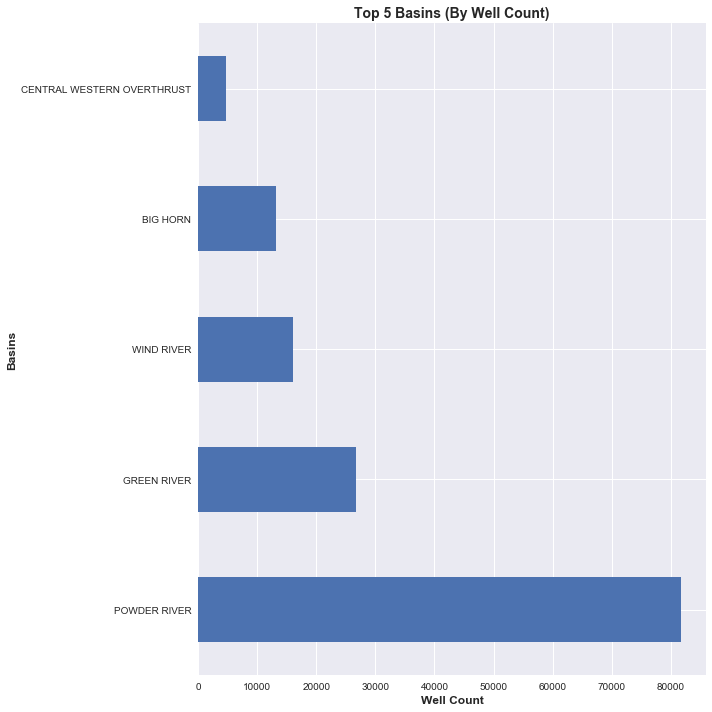

In [19]:
data_distinct['Basin'].value_counts()[:5].plot(kind='barh', figsize = (10,10))
plt.xlabel('Well Count', fontsize = 12, fontweight='bold')
plt.ylabel('Basins', fontsize = 12, fontweight='bold')
plt.title('Top 5 Basins (By Well Count)', fontsize = 14, fontweight='bold')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.grid = True
plt.tight_layout()
plt.show()

In [20]:
#Data for Powder River Basin with a focus on Oil
data_powder = pd.read_sql_query(''' 
                                  SELECT DISTINCT 
                                  [API/UWI], [Operator Alias], [Reservoir], [Production Type],
                                  [Cum Gas], [Cum Oil], [Cum BOE],
                                  [Field], [Basin],[County/Parish]                         
                                  FROM ProductiontableWY
                                  WHERE ([Basin] = 'POWDER RIVER' AND [Production Type]='OIL')
                                  ORDER BY [Cum Oil] DESC
                                  LIMIT 10
                                  ;''', conn)

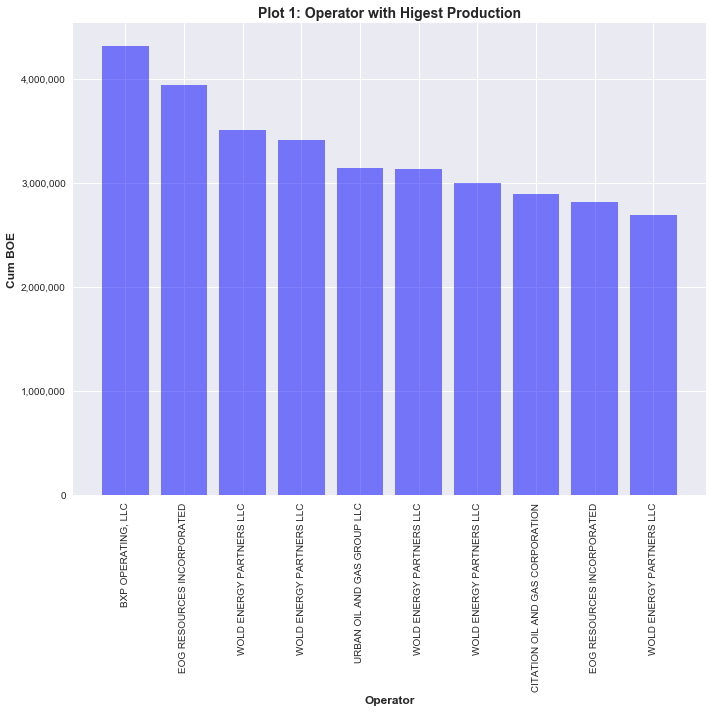

In [22]:
#Plot 2: Identify the operator with highest oil production
fig, ax = plt.subplots()
axes = plt.gca()
x = np.arange(len(data_powder['Operator Alias']))
y = data_powder['Cum Oil'].values
x_name = data_powder['Operator Alias']
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
fig.subplots_adjust(top=0.85)
ax.set_title('Plot 1: Operator with Higest Production', fontsize=14, fontweight='bold')
ax.set_xlabel('Operator', fontsize = 12, fontweight='bold')
ax.set_ylabel('Cum BOE', fontsize = 12, fontweight='bold')
plt.grid = False
plt.xticks(x, x_name, rotation=90)
fig.set_size_inches(10, 10)
ax.bar(x,y, align='center', alpha=0.5, color = 'b')
plt.tight_layout()
plt.show()